In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,  TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("spam_ham_dataset.csv")
df.drop('Unnamed: 0', axis=1, inplace = True)

In [4]:
print(df.head())

  label                                               text  class
0   ham  Subject: enron methanol ; meter # : 988291\r\n...      0
1   ham  Subject: hpl nom for january 9 , 2001\r\n( see...      0
2   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...      0
3  spam  Subject: photoshop , windows , office . cheap ...      1
4   ham  Subject: re : indian springs\r\nthis deal is t...      0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
 2   class   5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB
None


In [6]:
print(df.describe())

             class
count  5171.000000
mean      0.289886
std       0.453753
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


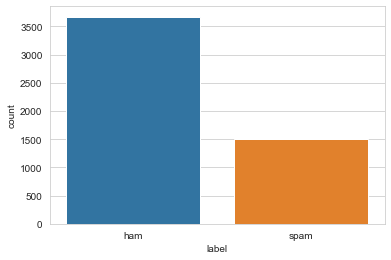

In [7]:
sns.countplot(data = df, x = 'label');

In [8]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words("english")]
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]
    return " ".join(tokens)

In [9]:
text_tokens=[]
for words in df ["text"]:
    tokens=preprocess_text(words)
    text_tokens.append("".join(tokens))

In [11]:
df["text"]=text_tokens
df.head()

,label,text,class
0,ham,subject enron methanol meter 988291 follow not...,0
1,ham,subject hpl nom january 9 2001 see attached fi...,0
2,ham,subject neon retreat ho ho ho around wonderful...,0
3,spam,subject photoshop window office cheap main tre...,1
4,ham,subject indian spring deal book teco pvr reven...,0


In [12]:
X = df.loc[:, 'text']
y = df.loc[:, 'class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [13]:
vect = CountVectorizer()
vect.fit(X_train,X_test)
x_train = vect.transform(X_train)
x_test=vect.transform(X_test)
x_train = x_train.toarray()
x_test=x_test.toarray()
print(x_train)
print(x_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)
x_train_tfidf = X_train_tfidf.toarray()
x_test_tfidf=X_test_tfidf.toarray()

print(x_train_tfidf)
print(x_test_tfidf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04899022 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.02449548 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


[Text(0.6, 0.8333333333333334, 'X[15973] <= 0.5\ngini = 0.414\nsamples = 4136\nvalue = [2928, 1208]'),
 Text(0.4, 0.5, 'X[20811] <= 0.5\ngini = 0.482\nsamples = 2975\nvalue = [1767, 1208]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.437\nsamples = 2532\nvalue = [1714, 818]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.211\nsamples = 443\nvalue = [53, 390]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 1161\nvalue = [1161, 0]')]

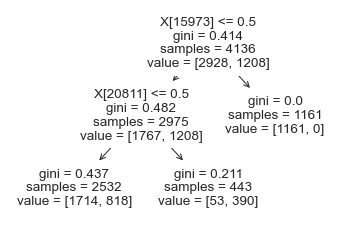

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(max_depth=2)
model_dt= clf.fit(x_train,y_train)
plot_tree(model_dt)

In [16]:
y_pred = model_dt.predict(x_test)

In [17]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       744
           1       0.91      0.89      0.90       291

    accuracy                           0.94      1035
   macro avg       0.93      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



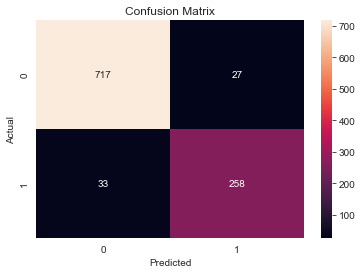

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
user_input=input("Enter the Mail Subject: ")

Enter the Mail Subject: Subject: looking for medication ? we ` re the best source .


In [22]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words("english")]
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]
    return " ".join(tokens)

In [23]:
processed_input = preprocess_text(user_input)

input_vector = vect.transform([processed_input])

In [25]:
prediction_lr = model_dt.predict(input_vector)[0]

if prediction_lr==0:
  print("Ham mail")
else:
  print("Spam mail")

Ham mail


In [19]:
import pickle

In [20]:
filename='trained_dt.sav'
pickle.dump(clf,open(filename,'wb'))

In [21]:
loaded_model_dt=pickle.load(open('trained_dt.sav','rb'))